# Non-Random Patterns in Stochastic Social Network Evolution

## Notes from the Professor:

- Good choice of dataset, relevant and rich for temporal analysis and holistic modeling of dynamic social networks.
- FOCUS ON CLASS 7 MATERIAL: Dynamic social networks, influences by hubs in time:
  - Threshold (deterministic) vs independent cascade models (probabilistic)
  - Information diffusion models (markov chains, SIR/SIS?)
- Understanding a network by modeling the network creation process is a key aspect:
  - For example, our user-user interaction network has a pareto distribution of node degrees
  - Can we model this network generation process? Can we simulate similar networks with a Barabási-Albert (BA) extended model or other?
  - Could it be modeled as a stochastic block model (SBM) or an extension like the dynamic SBM?
- Consider also modeling how network evolves over time (social network dynamics).

## Research questions:

1. **Equilibrium dynamics:** Do user-user interaction networks in r/Documentaries exhibit stationary transition probabilities and satisfy detailed balance conditions despite continuous microscopic rewiring?
2. **Hub persistence:** To what extent do overlapping community/hubs (identified via BigCLAM) maintain their structural positions across temporal snapshots, and what role does bursty switching dynamics play in hub collapse?
3. **Community evolution:** Can we model community evolution using spatiotemporal graph Laplacians and detect non-random patterns in what appears to be stochastic community fragmentation?
4. **Predictive stability:** Given features derived from network motifs, sentiment analysis coherence, and temporal activity patterns, can we predict which communities will maintain structural integrity across time windows?
5. **Sentiment coevolution:** How does sentiment polarization (measured via VADER) co-evolve with community structure, and does sentiment homogeneity predict/is related to community stability?

## Dataset useful information / metadata (from the source website)

* **Scope:** Timestamps from their creation up to **October 2018**.
* **Structure:**
  * Each **subreddit** has its own corpus (`subreddit-[name]`).
  * Each **post + comment thread** is a *conversation*.
  * Each **comment or post** is an *utterance*.
  * Each **user** is a *speaker* (identified by Reddit username).
* **Utterance-level fields:** ID, speaker, conversation ID, reply-to ID, timestamp, text, score, gilding info, stickied status, permalink, and author flair.
* **Conversation-level fields:** Title, number of comments, domain, subreddit name, gilding, stickied status, and author flair.
* **Corpus-level fields:** Subreddit name, total posts, total comments, and number of unique speakers.
* **Usage:** Can be downloaded as a zip file or loaded with `convokit`, and combined with other subreddit corpora for cross-community analysis.
* **Notes:**
  * Some subreddit data may be incomplete or contain broken thread links.
  * Large subreddits may have very large corpus files.
  * Speaker counts may be inflated due to duplicates in preprocessing.
  * Dataset is **beta** and subject to updates for completeness and data consistency.

# Run the full analysis pipeline

REDDIT USER-USER INTERACTIONS NETWORK ANALYSIS
CONFIGURATION:
    • Snapshots per year: 1
    • Minimum GCC size: 10000 nodes
    • Overlapping community detection enabled: Yes (BigClam)
    • Checkpoints enabled: Yes (../data/02_preprocessed)
    • Parallel workers: 1
Initialized Reddit Network Analyzer with 1 parallel workers
Loading raw data...
Attempting to reuse checkpoint...
Loaded checkpoint: full_data_raw.pkl
Using cached data
Data loading complete
Created global comment user map with 2,598,721 entries
Loaded:
    • Posts: 194,036
    • Comments: 2,598,721
    • Non-empty comments: 2,247,050
    • Unique users: 487,982
Sample of comments:
Comment 0 (780 characters): Hey,
I've been looking for a good documentary film podcast but haven't found any. Can anyone recomme...
Comment 1 (119 characters): I would love to get my hands on a copy but wanted to know if it was any good and/or if anybody knew ...
Comment 2 (9 characters): [removed]...
Comment 3 (196 characters): An awesome doc

Traceback (most recent call last):
  File "c:\Users\mjvsilva\Documents\_mystuff\ACD\Social_Net_analysis\code\src\pipeline.py", line 154, in run_analysis
    analyzer.run_network_analysis()
  File "c:\Users\mjvsilva\Documents\_mystuff\ACD\Social_Net_analysis\code\src\helpers\network_analyzer.py", line 1009, in run_network_analysis
    self._create_temporal_plots(aux_df_posts, aux_df_comments)
  File "c:\Users\mjvsilva\Documents\_mystuff\ACD\Social_Net_analysis\code\src\helpers\network_analyzer.py", line 1174, in _create_temporal_plots
    monthly_comments.plot(ax=axes[0, 0], linewidth=2)
  File "c:\Users\mjvsilva\Documents\_mystuff\ACD\Social_Net_analysis\.venv\Lib\site-packages\pandas\plotting\_core.py", line 1030, in __call__
    return plot_backend.plot(data, kind=kind, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mjvsilva\Documents\_mystuff\ACD\Social_Net_analysis\.venv\Lib\site-packages\pandas\plotting\_matplotlib\__init__.py", line 71, in plot

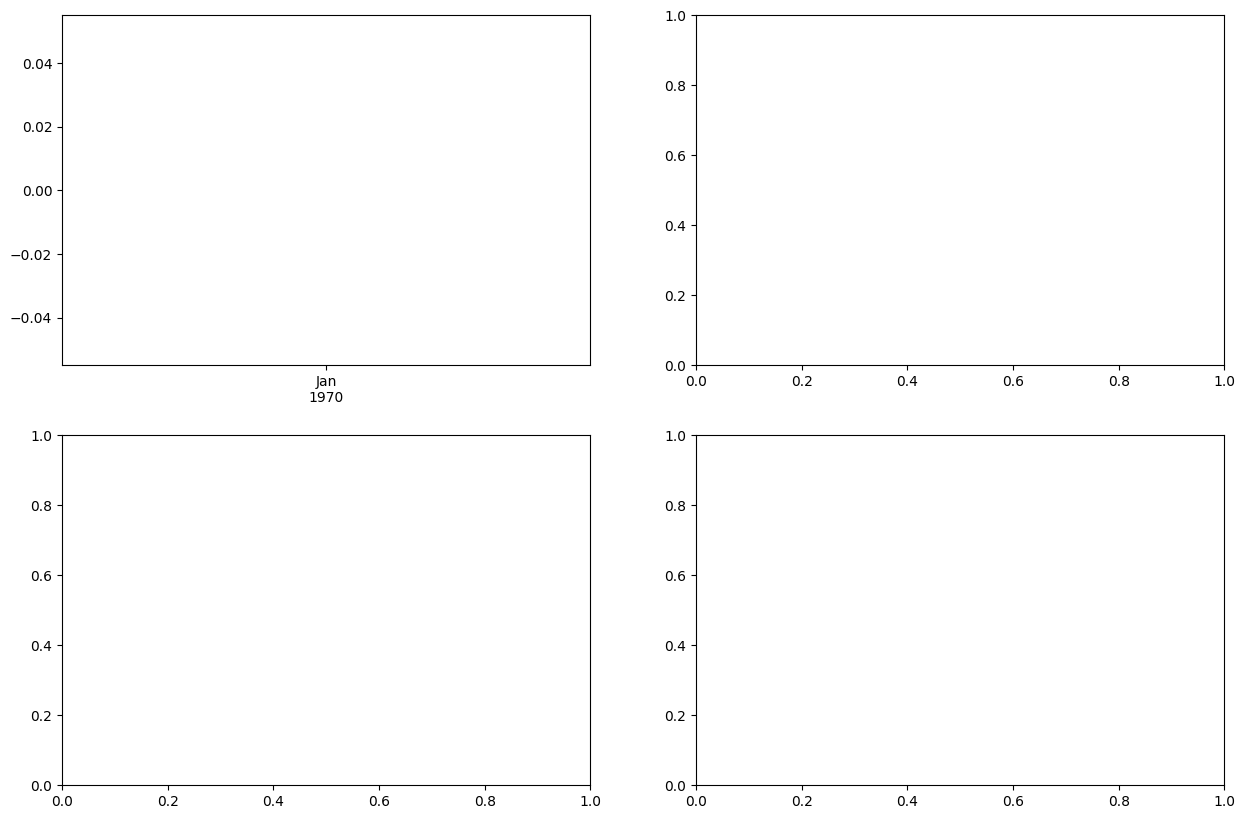

In [1]:
import src.pipeline as pipeline

analyzer = pipeline.run_analysis(
    data_path="../data/01_raw",
    snapshots_per_year=1,
    min_giant_component_size=10_000,
    overlapping_communities=True,  # Set to False for non-overlapping (Louvain) communities
    use_checkpoints=True,
    checkpoint_dir="../data/02_preprocessed",
    reports_dir="../data/04_reports",
    n_workers=1,
)